# Data Preparation

Tareas por realizar en la etapa de preparacion:

- Seleccion de datos relevantes
- limpieza de los datos (missing values, outliers)
- Construir nuevas variables (feature engineering)
- Integrar datos de múltiples fuentes
- Formatear y transformar datos

Algunas tareas a tomar en cuenta

- Completando los valores faltantes restantes con ceros

- Añadiendo las siguientes categorías a los datos mediante las funciones creadas anteriormente.

- Las siguientes funciones se utilizan para obtener los valores redondeados de diferentes columnas.

- Renombrar columnas

In [373]:
%load_ext kedro.ipython 
catalog.keys()

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython



[
    'model_input_table',
    'parameters',
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20'
]

In [374]:
FIFA22_df = catalog.load("DataSetFIFA22")
FIFA21_df = catalog.load("DataSetFIFA21")
FIFA20_df = catalog.load("DataSetFIFA20")

[10/26/25 05:58:50] INFO     Loading data from DataSetFIFA22 (CSVDataset)...                   ]8;id=382194;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=195259;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from DataSetFIFA21 (CSVDataset)...                   ]8;id=878089;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=130491;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[10/26/25 05:58:51] INFO     Loading data from DataSetFIFA20 (CSVDataset)...                   ]8;id=67343;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=969326;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [375]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


### **Seleccion de datos relevantes**

### **Columnas eliminadas**

Identificadores / texto libre / URLs:
ID, Name, Photo, Flag, Club Logo. No aportan 

In [376]:
#FIFA 22
FIFA22_df.drop(columns=['Photo'], inplace=True)
FIFA22_df.drop(columns=['Flag'], inplace=True)
FIFA22_df.drop(columns=['Club Logo'], inplace=True)
FIFA22_df.drop(columns=['Real Face'], inplace=True)

#FIFA 21
FIFA21_df.drop(columns=['Photo'], inplace=True)
FIFA21_df.drop(columns=['Flag'], inplace=True)
FIFA21_df.drop(columns=['Club Logo'], inplace=True)
FIFA21_df.drop(columns=['Real Face'], inplace=True)

#FIFA 20
FIFA20_df.drop(columns=['Photo'], inplace=True)
FIFA20_df.drop(columns=['Flag'], inplace=True)
FIFA20_df.drop(columns=['Club Logo'], inplace=True)
FIFA20_df.drop(columns=['Real Face'], inplace=True)

#### **Eliminación de la columna `Loaned From`**

Si bien la columna `Loaned From`podría ser imputada con valores como “No Loan” o “Sin préstamo”, al comparar la cantidad de datos faltantes con el total del dataframe, se observa que esta característica contiene muy pocos valores registrados. Por ello, su imputación podría introducir sesgos en el análisis, ya que la mayoría de los jugadores no se encuentran en condición de préstamo. En consecuencia, se decidió eliminar esta columna del conjunto de datos.

In [377]:
##Columnas con una gran cantidad de valores nulos. 
FIFA22_df.drop(columns=['Loaned From'], inplace=True)
FIFA21_df.drop(columns=['Loaned From'], inplace=True)
FIFA20_df.drop(columns=['Loaned From'], inplace=True)

### **Eliminacion de datos outliers**
Este proceso se repite para los dataframe FIFA22,21 y 20

In [378]:
'''
predictors = [
    'Age', 'Overall', 'Potential', 'Special', 'International Reputation',
    'Skill Moves', 'Crossing', 'Finishing', 'ShortPassing', 'Volleys',
    'Dribbling', 'Curve', 'LongPassing', 'BallControl', 'Acceleration',
    'Agility', 'Reactions', 'ShotPower', 'Stamina', 'LongShots',
    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Best Overall Rating', 'offensive_skills', 'Wage_num', 'Release Clause_num'
]

def plot_only_boxplots(df, year_label):
    predictors_exist = [col for col in predictors if col in df.columns]

    for col in predictors_exist:
        plt.figure(figsize=(8, 4))
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot de {col} - FIFA {year_label}')
        plt.tight_layout()
        plt.show()
plot_only_boxplots(FIFA22_df, "22")
'''

'\npredictors = [\n    \'Age\', \'Overall\', \'Potential\', \'Special\', \'International Reputation\',\n    \'Skill Moves\', \'Crossing\', \'Finishing\', \'ShortPassing\', \'Volleys\',\n    \'Dribbling\', \'Curve\', \'LongPassing\', \'BallControl\', \'Acceleration\',\n    \'Agility\', \'Reactions\', \'ShotPower\', \'Stamina\', \'LongShots\',\n    \'Interceptions\', \'Positioning\', \'Vision\', \'Penalties\', \'Composure\',\n    \'Best Overall Rating\', \'offensive_skills\', \'Wage_num\', \'Release Clause_num\'\n]\n\ndef plot_only_boxplots(df, year_label):\n    predictors_exist = [col for col in predictors if col in df.columns]\n\n    for col in predictors_exist:\n        plt.figure(figsize=(8, 4))\n        sns.boxplot(y=df[col])\n        plt.title(f\'Boxplot de {col} - FIFA {year_label}\')\n        plt.tight_layout()\n        plt.show()\nplot_only_boxplots(FIFA22_df, "22")\n'

Segun el contexto de cada caracteristica, se mantienen, se pulen o se eliminan valores atipicos.

In [379]:
FIFA22_df['Overall'].min()

np.int64(28)

In [380]:
#AGE: se eliminan jugadores >=39
FIFA22_df.drop(FIFA22_df[FIFA22_df['Age'] >=39 ].index, inplace=True)   
FIFA22_df.drop(FIFA22_df[FIFA22_df['Overall'] <32 ].index, inplace=True)
#FIFA22_df.drop(FIFA22_df[FIFA22_df['Skill Moves'] >=4.5 ].index, inplace=True) no se elimina
FIFA22_df.drop(FIFA22_df[FIFA22_df['Crossing'] <=7.0 ].index, inplace=True)
FIFA22_df.drop(FIFA22_df[FIFA22_df['Dribbling'] >=96.0 ].index, inplace=True)
#Se eliminan o se suaviza la eliminacion de datos atipicos en pases largos
#FIFA22_df.drop(FIFA22_df[FIFA22_df['LongPassing'] <= ].index, inplace=True) Sin eliminar 
#FIFA22_df.drop(FIFA22_df[FIFA22_df['BallControl'] >= ].index, inplace=True)Sin eliminar 
FIFA22_df.drop(FIFA22_df[FIFA22_df['Vision'] >=92.0 ].index, inplace=True)
FIFA22_df.drop(FIFA22_df[FIFA22_df['Penalties'] >=92.0].index, inplace=True)
FIFA22_df.drop(FIFA22_df[FIFA22_df['Penalties'] <= 8.0].index, inplace=True)
FIFA22_df.drop(FIFA22_df[FIFA22_df['Composure'] >= 91.0].index, inplace=True)
# No se eliminan valores para overall raiting

In [381]:
# Comentare los boxplots de fifa21 ya que son muchos

#plot_only_boxplots(FIFA21_df, "21")

In [382]:
FIFA21_df.drop(FIFA21_df[FIFA21_df['Age'] >=39 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Overall'] <=46 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Special'] >=2303 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Reactions'] <=24.0 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Penalties'] >=94.0 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Penalties'] <=8.0 ].index, inplace=True)   

In [383]:
# Comentare los boxplots de fifa20 ya que son muchos
#plot_only_boxplots(FIFA20_df, "20")

In [384]:
FIFA20_df.drop(FIFA20_df[FIFA20_df['Age'] >=38 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['Overall'] <=44 ].index, inplace=True)
FIFA20_df.drop(FIFA20_df[FIFA20_df['Special'] >=2299 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['ShortPassing'] >=92 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['Potential'] <=46 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['LongPassing'] <=13 ].index, inplace=True)  
FIFA20_df.drop(FIFA20_df[FIFA20_df['BallControl'] >=93 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['ShotPower'] <=19 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['Penalties'] <=8 ].index, inplace=True)   

### **Feature engineering**

**Promedio de habilidades ofensivas (`Offensive_Skills`):** Con las caracteristicas del jugador ofensivo (ataque) a partir de las caracteristicas de Finishing, Dribbling y ShotPower para  crea una variable llamada Offensive_Skills O Habilidades ofensivas la cual calcula el promedio ofe

**Promedio de habilidades defensivas (`Defensive_Skills`):**

In [385]:
FIFA22_df['Offensive_Skills'] = FIFA22_df[['Finishing', 'Dribbling', 'ShotPower']].mean(axis=1)
FIFA22_df['Defensive_Skills'] = FIFA22_df[['Marking', 'StandingTackle', 'SlidingTackle',
                                           'Interceptions', 'Strength', 'Aggression']].mean(axis=1)

# FIFA21
FIFA21_df['Offensive_Skills'] = FIFA21_df[['Finishing', 'Dribbling', 'ShotPower']].mean(axis=1)
FIFA21_df['Defensive_Skills'] = FIFA21_df[['Marking', 'StandingTackle', 'SlidingTackle',
                                           'Interceptions', 'Strength', 'Aggression']].mean(axis=1)

# FIFA20
FIFA20_df['Offensive_Skills'] = FIFA20_df[['Finishing', 'Dribbling', 'ShotPower']].mean(axis=1)
FIFA20_df['Defensive_Skills'] = FIFA20_df[['Marking', 'StandingTackle', 'SlidingTackle',
                                           'Interceptions', 'Strength', 'Aggression']].mean(axis=1)


Para posible modelo de clasificación

In [386]:
# Función de clasificación
def overall_class(x):
    if x >= 85:
        return "Alto"
    elif x >= 70:
        return "Medio"
    else:
        return "Bajo"

FIFA22_df['Overall_Class'] = FIFA22_df['Overall'].apply(overall_class)
FIFA21_df['Overall_Class'] = FIFA21_df['Overall'].apply(overall_class)
FIFA20_df['Overall_Class'] = FIFA20_df['Overall'].apply(overall_class)

print("FIFA22 nulos:", FIFA22_df['Overall_Class'].isnull().sum())
print("FIFA21 nulos:", FIFA21_df['Overall_Class'].isnull().sum())
print("FIFA20 nulos:", FIFA20_df['Overall_Class'].isnull().sum())

FIFA22 nulos: 0
FIFA21 nulos: 0
FIFA20 nulos: 0


In [387]:
FIFA22_df['Overall_Class'].head(10)


0      Alto
1      Alto
2      Alto
4     Medio
5      Alto
6     Medio
7     Medio
8     Medio
9      Alto
11     Alto
Name: Overall_Class, dtype: object

s

In [388]:
# FIFA22
FIFA22_df['Joined'] = pd.to_datetime(FIFA22_df['Joined'], errors='coerce')
FIFA22_df['Joined_Year'] = FIFA22_df['Joined'].dt.year.astype('Int64')
FIFA22_df['Joined_Month'] = FIFA22_df['Joined'].dt.month.astype('Int64')
FIFA22_df['Joined_Day'] = FIFA22_df['Joined'].dt.day.astype('Int64')

# FIFA21
FIFA21_df['Joined'] = pd.to_datetime(FIFA21_df['Joined'], errors='coerce')
FIFA21_df['Joined_Year'] = FIFA21_df['Joined'].dt.year.astype('Int64')
FIFA21_df['Joined_Month'] = FIFA21_df['Joined'].dt.month.astype('Int64')
FIFA21_df['Joined_Day'] = FIFA21_df['Joined'].dt.day.astype('Int64')

# FIFA20
FIFA20_df['Joined'] = pd.to_datetime(FIFA20_df['Joined'], errors='coerce')
FIFA20_df['Joined_Year'] = FIFA20_df['Joined'].dt.year.astype('Int64')
FIFA20_df['Joined_Month'] = FIFA20_df['Joined'].dt.month.astype('Int64')
FIFA20_df['Joined_Day'] = FIFA20_df['Joined'].dt.day.astype('Int64')

# resultado
print("FIFA22 - Joined:")
print(FIFA22_df[['Joined', 'Joined_Year', 'Joined_Month', 'Joined_Day']].head(), "\n")

print("FIFA21 - Joined:")
print(FIFA21_df[['Joined', 'Joined_Year', 'Joined_Month', 'Joined_Day']].head(), "\n")

print("FIFA20 - Joined:")
print(FIFA20_df[['Joined', 'Joined_Year', 'Joined_Month', 'Joined_Day']].head(), "\n")

FIFA22 - Joined:
      Joined  Joined_Year  Joined_Month  Joined_Day
0 2020-01-30         2020             1          30
1 2018-07-01         2018             7           1
2 2020-09-25         2020             9          25
4 2020-09-14         2020             9          14
5 2015-07-01         2015             7           1 

FIFA21 - Joined:
      Joined  Joined_Year  Joined_Month  Joined_Day
3 2019-07-12         2019             7          12
4 2020-09-14         2020             9          14
5 2016-07-13         2016             7          13
6 2019-01-15         2019             1          15
7 2018-07-01         2018             7           1 

FIFA20 - Joined:
      Joined  Joined_Year  Joined_Month  Joined_Day
4        NaT         <NA>          <NA>        <NA>
5 2016-07-13         2016             7          13
6 2019-01-15         2019             1          15
7        NaT         <NA>          <NA>        <NA>
8 2010-02-10         2010             2          10 



#### **Formatear y transformar datos**

In [389]:
FIFA22_df.describe(include=object)

,Name,Nationality,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Position,Contract Valid Until,Height,Weight,Best Position,Release Clause,Overall_Class
count,16585,16585,16321,16585,16585,16585,16585,16559,16559,16234,16585,16585,16585,14879,16585
unique,15975,168,866,249,133,2,10,10,29,56,50,57,15,1154,3
top,J. Rodríguez,England,Lazio,€1.2M,€2K,Right,Medium/ Medium,Normal (170-185),"<span class=""pos pos28"">SUB",2022,180cm,70kg,CB,€1.1M,Bajo
freq,10,1835,43,583,2304,12510,7800,5678,7142,4743,1281,1300,3198,451,10310


#### **Cambio de formato para `Position`**

Debido a un error de extracción en la característica `Position`, donde los valores presentan etiquetas HTML (por ejemplo: `<span class="pos pos18">CAM`), se realizará una modificación para conservar únicamente los últimos dos o tres caracteres, con el fin de obtener correctamente la posición del jugador.

In [390]:
print(FIFA22_df["Position"].head())

0    <span class="pos pos18">CAM
1    <span class="pos pos11">LDM
2     <span class="pos pos24">RS
4      <span class="pos pos7">LB
5     <span class="pos pos9">RDM
Name: Position, dtype: object


In [391]:
# FIFA 22
FIFA22_df["Position"] = FIFA22_df["Position"].str[-3:].str.strip()
FIFA22_df["Position"] = FIFA22_df["Position"].str.replace(">", "", regex=False).str[-3:]
print("FIFA22 positions:", FIFA22_df["Position"].unique())

# FIFA 21
FIFA21_df["Position"] = FIFA21_df["Position"].str[-3:].str.strip()
FIFA21_df["Position"] = FIFA21_df["Position"].str.replace(">", "", regex=False).str[-3:]
print("FIFA21 positions:", FIFA21_df["Position"].unique())

# FIFA 20
FIFA20_df["Position"] = FIFA20_df["Position"].str[-3:].str.strip()
FIFA20_df["Position"] = FIFA20_df["Position"].str.replace(">", "", regex=False).str[-3:]
print("FIFA20 positions:", FIFA20_df["Position"].unique())

FIFA22 positions: ['CAM' 'LDM' 'RS' 'LB' 'RDM' 'LCM' 'SUB' 'LS' 'RM' 'RCM' 'LM' 'RB' 'CDM'
 'LW' 'ST' 'RW' 'RF' 'LWB' 'RAM' 'CF' 'RES' 'LF' 'CM' 'LCB' 'RWB' 'CB'
 'RCB' nan 'LAM' 'GK']
FIFA21 positions: ['RW' 'LB' 'LDM' 'SUB' 'RDM' 'LCM' 'RCB' 'LCB' 'RCM' 'CAM' 'ST' 'RB' 'LS'
 'CDM' 'LW' 'LM' 'CF' 'RES' 'CM' 'RS' 'RM' 'LWB' 'LAM' 'LF' 'RF' 'RWB'
 'CB' nan 'RAM' 'GK']
FIFA20 positions: ['LCM' 'LB' 'LDM' 'RF' 'LCB' 'SUB' 'RCM' 'CDM' 'RW' 'LS' 'CF' 'LM' 'RB'
 'LW' 'RDM' 'CM' 'CAM' 'RES' 'LF' 'ST' 'RAM' 'LWB' 'LAM' 'RM' 'RCB' 'RS'
 'RWB' 'CB' nan 'GK']


#### **Cambio de formato para `Height` y `Weight`**

En la variable `Height`, se eliminarán las unidades de medida (por ejemplo, 179cm pasará a 179). Además, los valores expresados en pies y pulgadas (como 6'0") serán convertidos a centímetros, manteniendo únicamente valores **numéricos**.

En la variable `Weight`, se unificarán las unidades de medida expresadas en libras (lbs) y kilogramos (kg), transformando todos los valores a un formato numérico entero (int64).

In [392]:
FIFA22_df["Height"].unique()


array(['179cm', '189cm', '182cm', '172cm', '177cm', '183cm', '175cm',
       '186cm', '176cm', '184cm', '180cm', '181cm', '178cm', '191cm',
       '185cm', '188cm', '170cm', '168cm', '174cm', '171cm', '173cm',
       '167cm', '187cm', '169cm', '190cm', '192cm', '193cm', '194cm',
       '166cm', '165cm', '163cm', '197cm', '195cm', '160cm', '158cm',
       '161cm', '157cm', '196cm', '162cm', '164cm', '198cm', '201cm',
       '200cm', '159cm', '156cm', '199cm', '155cm', '202cm', '203cm',
       '206cm'], dtype=object)

In [393]:
def _formato_height(x: pd.Series) -> pd.Series:
    def convertir_altura(valor):
        if isinstance(valor, str):
            if "cm" in valor:
                # Caso: viene en centímetros
                return int(valor.replace("cm", "").strip())
            elif "'" in valor:
                # Caso: viene en pies y pulgadas -> ej. "5'11"
                partes = valor.replace('"', "").split("'")
                pies = int(partes[0])
                pulgadas = int(partes[1]) if partes[1] else 0
                return round((pies * 30.48) + (pulgadas * 2.54))
        return None  # si no cumple formato o es NaN
    
    return x.apply(convertir_altura)

resultado_final_height22 = _formato_height(FIFA22_df["Height"])   
resultado_final_height21 = _formato_height(FIFA21_df["Height"])    
resultado_final_height20 = _formato_height(FIFA20_df["Height"])    

print("ALTURA FIFA 22:")
print(resultado_final_height22.head())

print("\nALTURA FIFA 21:")
print(resultado_final_height21.head())

print("\nALTURA FIFA 20:")
print(resultado_final_height20.head())


ALTURA FIFA 22:
0    179
1    189
2    182
4    172
5    177
Name: Height, dtype: int64

ALTURA FIFA 21:
3    175
4    173
5    180
6    183
7    175
Name: Height, dtype: int64

ALTURA FIFA 20:
4    173
5    180
6    183
7    175
8    180
Name: Height, dtype: int64


In [394]:
print("PESOS FIFA 20:")
print(FIFA20_df["Weight"].unique())

print("\nPESOS FIFA 21:")
print(FIFA21_df["Weight"].unique())

print("\nPESOS FIFA 22:")
print(FIFA22_df["Weight"].unique())


PESOS FIFA 20:
['152lbs' '157lbs' '176lbs' '143lbs' '172lbs' '165lbs' '146lbs' '179lbs'
 '148lbs' '161lbs' '185lbs' '150lbs' '181lbs' '183lbs' '168lbs' '174lbs'
 '163lbs' '170lbs' '154lbs' '137lbs' '159lbs' '194lbs' '134lbs' '187lbs'
 '196lbs' '190lbs' '132lbs' '198lbs' '141lbs' '201lbs' '192lbs' '203lbs'
 '139lbs' '128lbs' '207lbs' '209lbs' '212lbs' '130lbs' '205lbs' '220lbs'
 '123lbs' '121lbs' '115lbs' '223lbs' '126lbs' '216lbs' '214lbs' '117lbs'
 '119lbs' '218lbs' '243lbs' '110lbs' '225lbs' '227lbs']

PESOS FIFA 21:
['161lbs' '152lbs' '157lbs' '176lbs' '143lbs' '190lbs' '181lbs' '168lbs'
 '146lbs' '172lbs' '165lbs' '179lbs' '185lbs' '159lbs' '148lbs' '150lbs'
 '183lbs' '163lbs' '154lbs' '170lbs' '174lbs' '137lbs' '194lbs' '134lbs'
 '187lbs' '196lbs' '132lbs' '141lbs' '201lbs' '192lbs' '203lbs' '139lbs'
 '198lbs' '207lbs' '128lbs' '130lbs' '209lbs' '212lbs' '220lbs' '123lbs'
 '205lbs' '126lbs' '121lbs' '214lbs' '216lbs' '119lbs' '117lbs' '229lbs'
 '243lbs' '223lbs' '110lbs' '218lbs' 

In [395]:
def formato_weight(x: pd.Series) -> pd.Series:
    # Si tiene 'lbs', convertir a kg
    if x.str.contains('lbs').any():
        x = x.str.replace('lbs', '', regex=False).astype(float) * 0.453592
    # Si tiene 'kg', eliminar el texto y dejar como float
    elif x.str.contains('kg').any():
        x = x.str.replace('kg', '', regex=False).astype(float)
    return x

In [396]:
formato_weight(FIFA22_df["Weight"])
formato_weight(FIFA21_df["Weight"])
formato_weight(FIFA20_df["Weight"])


4        68.945984
5        71.213944
6        79.832192
7        64.863656
8        78.017824
           ...    
17096    64.863656
17098    81.192968
17100    79.832192
17101    78.925008
17102    76.203456
Name: Weight, Length: 16930, dtype: float64

#### Cambio del formato para `Value`, `Wage` y `Release Clause`

In [397]:
def money_to_number(s):
    """Convert '€110.5M','€500K','€1.2B' or numeric-like strings into float (euros)."""
    if pd.isna(s): return np.nan
    if isinstance(s, (int, float)): return float(s)
    s = str(s).strip().replace('€','').replace('£','').replace(' ','')
    if s == '': return np.nan
    try:
        if s.endswith('M'): return float(s[:-1]) * 1e6
        if s.endswith('K'): return float(s[:-1]) * 1e3
        if s.endswith('B'): return float(s[:-1]) * 1e9
        # remove non-numeric chars
        return float(re.sub(r'[^\d.]','', s))
    except:
        return np.nan

# monetary columns: 'Value', 'Wage', 'Release Clause' (from df.info)
for col in ['Value', 'Wage', 'Release Clause']:
    if col in FIFA22_df.columns:
        newc = col + '_num'
        FIFA22_df[newc] = FIFA22_df[col].apply(money_to_number)
        print(f"Created {newc} from {col} - non-null:", FIFA22_df[newc].notna().sum())

for col in ['Value', 'Wage', 'Release Clause']:
    if col in FIFA21_df.columns:
        newc = col + '_num'
        FIFA21_df[newc] = FIFA21_df[col].apply(money_to_number)
        print(f"Created {newc} from {col} - non-null:", FIFA21_df[newc].notna().sum())

for col in ['Value', 'Wage', 'Release Clause']:
    if col in FIFA20_df.columns:
        newc = col + '_num'
        FIFA20_df[newc] = FIFA20_df[col].apply(money_to_number)
        print(f"Created {newc} from {col} - non-null:", FIFA20_df[newc].notna().sum())

Created Value_num from Value - non-null: 16272
Created Wage_num from Wage - non-null: 14209
Created Release Clause_num from Release Clause - non-null: 14879
Created Value_num from Value - non-null: 16634
Created Wage_num from Wage - non-null: 13747
Created Release Clause_num from Release Clause - non-null: 15420
Created Value_num from Value - non-null: 16511
Created Wage_num from Wage - non-null: 13187
Created Release Clause_num from Release Clause - non-null: 14665


eliminando columnas que ya no se utilizaran

In [398]:
FIFA22_df = FIFA22_df.drop(['Value', 'Wage', 'Release Clause'], axis=1)
FIFA21_df = FIFA21_df.drop(['Value', 'Wage', 'Release Clause'], axis=1)
FIFA20_df = FIFA20_df.drop(['Value', 'Wage', 'Release Clause'], axis=1)

In [399]:
# FIFA 22
value_f22 = FIFA22_df['Value_num'].head(3)
wage_f22 = FIFA22_df['Wage_num'].head(3)
release_f22 = FIFA22_df['Release Clause_num'].head(3)

print("FIFA 22 - Value:\n", value_f22)
print("FIFA 22 - Wage:\n", wage_f22)
print("FIFA 22 - Release Clause:\n", release_f22)

# FIFA 21
value_f21 = FIFA21_df['Value_num'].head(3)
wage_f21 = FIFA21_df['Wage_num'].head(3)
release_f21 = FIFA21_df['Release Clause_num'].head(3)

print("\nFIFA 21 - Value:\n", value_f21)
print("FIFA 21 - Wage:\n", wage_f21)
print("FIFA 21 - Release Clause:\n", release_f21)

# FIFA 20
value_f20 = FIFA20_df['Value_num'].head(3)
wage_f20 = FIFA20_df['Wage_num'].head(3)
release_f20 = FIFA20_df['Release Clause_num'].head(3)

print("\nFIFA 20 - Value:\n", value_f20)
print("FIFA 20 - Wage:\n", wage_f20)
print("FIFA 20 - Release Clause:\n", release_f20)

FIFA 22 - Value:
 0    107500000.0
1     93000000.0
2     44500000.0
Name: Value_num, dtype: float64
FIFA 22 - Wage:
 0    250000.0
1    140000.0
2    135000.0
Name: Wage_num, dtype: float64
FIFA 22 - Release Clause:
 0    206900000.0
1    160400000.0
2     91200000.0
Name: Release Clause_num, dtype: float64

FIFA 21 - Value:
 3    50500000.0
4    22000000.0
5    31000000.0
Name: Value_num, dtype: float64
FIFA 21 - Wage:
 3    290000.0
4     41000.0
5     23000.0
Name: Wage_num, dtype: float64
FIFA 21 - Release Clause:
 3    103500000.0
4     46200000.0
5     64300000.0
Name: Release Clause_num, dtype: float64

FIFA 20 - Value:
 4    20000000.0
5    31500000.0
6    35500000.0
Name: Value_num, dtype: float64
FIFA 20 - Wage:
 4    19000.0
5    23000.0
6    47000.0
Name: Wage_num, dtype: float64
FIFA 20 - Release Clause:
 4    40000000.0
5    65400000.0
6    56800000.0
Name: Release Clause_num, dtype: float64


Luego de realizar el cambio de formato a numerico para nuestra variable objetivo, realizamos una comparativa principal creando un histograma. Debido a que los valores de mercado estimado del jugador expresado en euros (€) contienen grante cantidades de digitos, se le aplicara la tecnica logaritmica para transformar y escalar los datos, obteniendo un buen resultado desde el histograma 1 y el histograma 2 aplicando log1. Como resultado final, se obtiene una distribucion casi normal en la que mejora la correlacion de pearson entre otras caracteristicas y teniendo una escala menor de los datos en Values.

**¿Porque busco usar log1p?**

- Se busca transformar value que contiene valores muy grandes.

**Implementación**

Si el uso de log1p es adecuado y es aprobado por el profesor, se aplicara durante la etapa 4 de Models, no se aplicara una transformación durante el procesamiento de los datos. De lo contrario, se buscara la maenra de reducir los valores de Values.

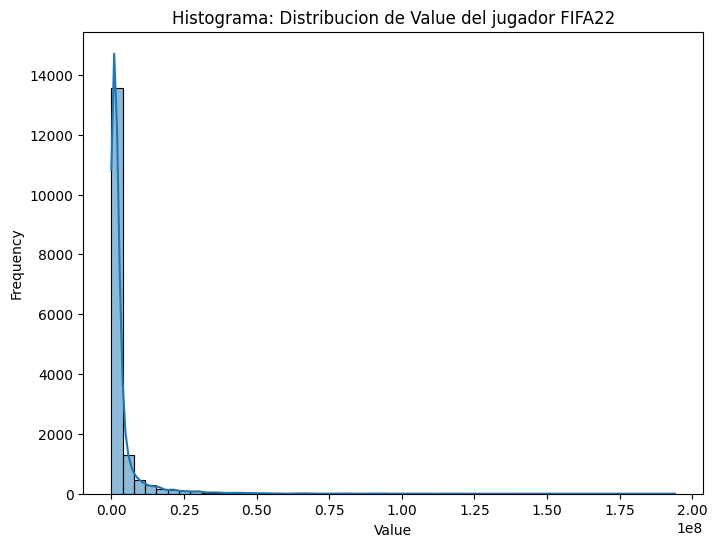

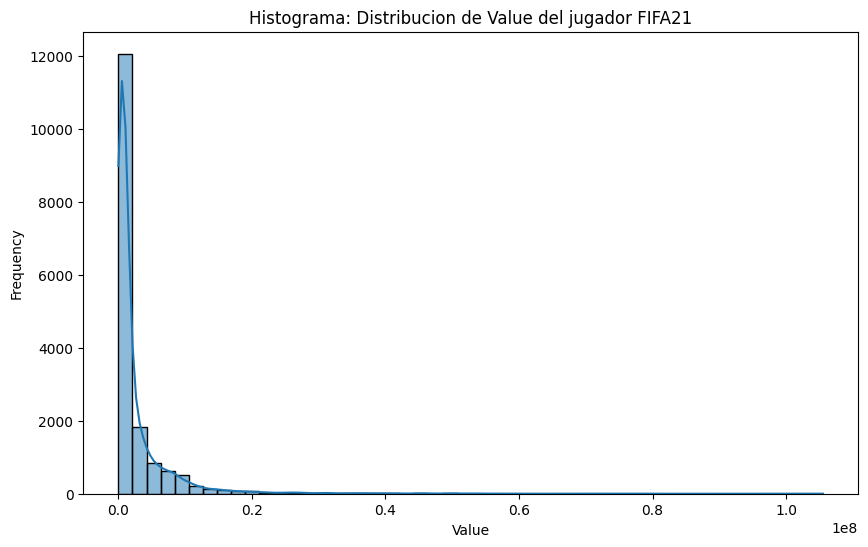

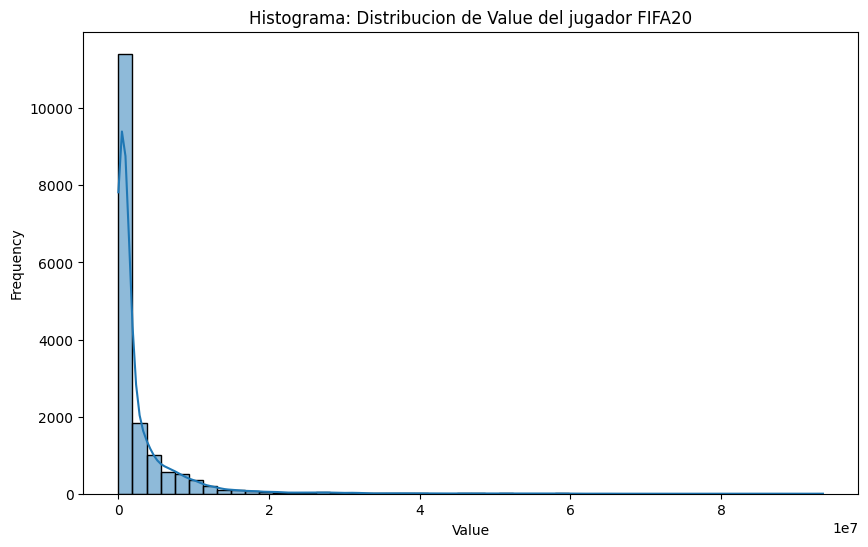

In [400]:
# FIFA22_df
plt.figure(figsize=(8, 6))
sns.histplot(FIFA22_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion de Value del jugador FIFA22')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#FIFA21_df
plt.figure(figsize=(10, 6))
sns.histplot(FIFA21_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion de Value del jugador FIFA21')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#FIFA20_df
plt.figure(figsize=(10, 6))
sns.histplot(FIFA20_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion de Value del jugador FIFA20')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [401]:
FIFA22_df['Value_num'] = np.log1p(FIFA22_df['Value_num'])  # log(1 + x)
FIFA21_df['Value_num'] = np.log1p(FIFA21_df['Value_num'])  #ojo, capaz la implementacion log no va en esta etapa sino en models.
FIFA20_df['Value_num'] = np.log1p(FIFA20_df['Value_num'])  

In [402]:
FIFA22_df['Value_num']


0        18.493001
1        18.348110
2        17.611000
4        17.426428
5        18.497642
           ...    
16703    12.043560
16705    11.512935
16706    12.100718
16707    11.512935
16708    11.608245
Name: Value_num, Length: 16585, dtype: float64

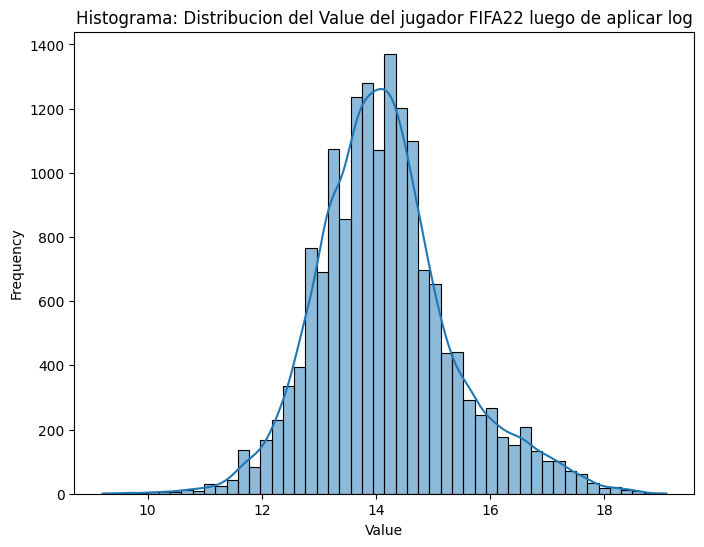

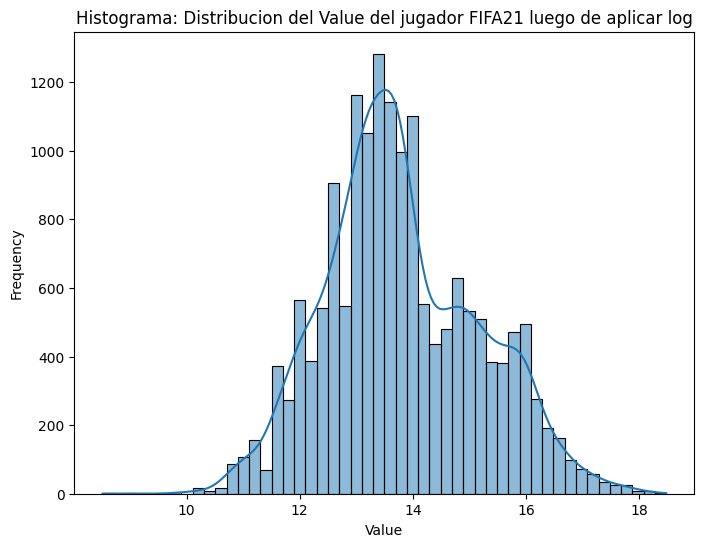

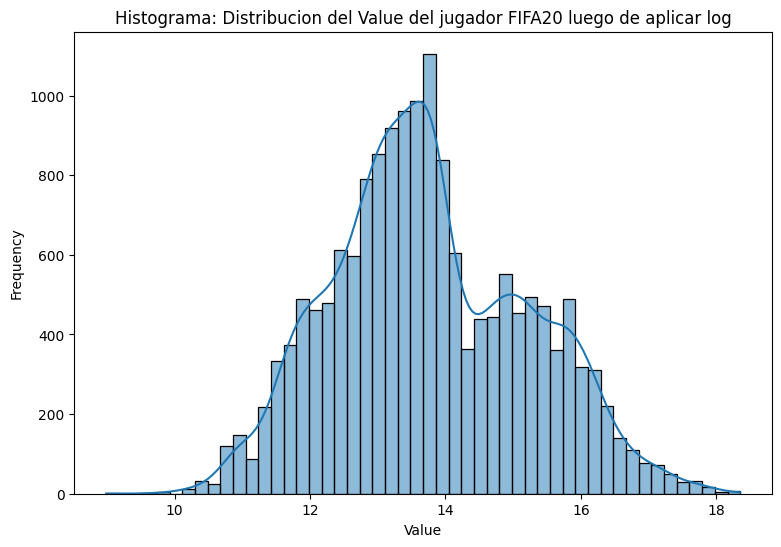

In [403]:
# FIFA22_df
plt.figure(figsize=(8, 6))
sns.histplot(FIFA22_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion del Value del jugador FIFA22 luego de aplicar log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#FIFA21_df
plt.figure(figsize=(8, 6))
sns.histplot(FIFA21_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion del Value del jugador FIFA21 luego de aplicar log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#FIFA20_df
plt.figure(figsize=(9, 6))
sns.histplot(FIFA20_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion del Value del jugador FIFA20 luego de aplicar log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


### **Imputacion**

Imputación para Marking

La característica Marking representa la capacidad defensiva de un jugador para marcar o contener al oponente. Dado que esta habilidad solo es relevante para jugadores con posiciones defensivas, los valores nulos se imputarán con cero, lo que refleja adecuadamente la ausencia de esta capacidad en futbolistas de otras posiciones.


In [404]:
# Imputar Marking con 0 en los tres datasets
FIFA22_df['Marking'].fillna(0, inplace=True)
FIFA21_df['Marking'].fillna(0, inplace=True)
FIFA20_df['Marking'].fillna(0, inplace=True)

# Verificar los nulos restantes en la columna Marking
print("Nulos en Marking FIFA22:", FIFA22_df['Marking'].isnull().sum())
print("Nulos en Marking FIFA21:", FIFA21_df['Marking'].isnull().sum())
print("Nulos en Marking FIFA20:", FIFA20_df['Marking'].isnull().sum())


[10/26/25 05:58:59] WARNING  C:\Users\brand\AppData\Local\Temp\ipykernel_61776\538116722.py:2:      warnings.py:110
                             FutureWarning: A value is trying to be set on a copy of a DataFrame or                
                             Series through chained assignment using an inplace method.                            
                             The behavior will change in pandas 3.0. This inplace method will never                
                             work because the intermediate object on which we are setting values                   
                             always behaves as a copy.                                                             
                                                                                                                   
                             For example, when doing 'df.method(value, inplace=True)', try using                   
                             'df.method({col: value}, inplace=True)' or df = df.method(value)                      
                             instead, to perform the operation inplace on the original object.                     
                                                                                                                   
                                                                                                                   
                               FIFA22_df['Marking'].fillna(0, inplace=True)                                        
                                                                                                                   

                    WARNING  C:\Users\brand\AppData\Local\Temp\ipykernel_61776\538116722.py:3:      warnings.py:110
                             FutureWarning: A value is trying to be set on a copy of a DataFrame or                
                             Series through chained assignment using an inplace method.                            
                             The behavior will change in pandas 3.0. This inplace method will never                
                             work because the intermediate object on which we are setting values                   
                             always behaves as a copy.                                                             
                                                                                                                   
                             For example, when doing 'df.method(value, inplace=True)', try using                   
                             'df.method({col: value}, inplace=True)' or df = df.method(value)                      
                             instead, to perform the operation inplace on the original object.                     
                                                                                                                   
                                                                                                                   
                               FIFA21_df['Marking'].fillna(0, inplace=True)                                        
                                                                                                                   

                    WARNING  C:\Users\brand\AppData\Local\Temp\ipykernel_61776\538116722.py:4:      warnings.py:110
                             FutureWarning: A value is trying to be set on a copy of a DataFrame or                
                             Series through chained assignment using an inplace method.                            
                             The behavior will change in pandas 3.0. This inplace method will never                
                             work because the intermediate object on which we are setting values                   
                             always behaves as a copy.                                                             
                                                                                                                   
                             For example, when doing 'df.method(value, inplace=True)', try using                   
                             'df.method({col: value}, inplace=True)' or df = df.method(value)                      
                             instead, to perform the operation inplace on the original object.                     
                                                                                                                   
                                                                                                                   
                               FIFA20_df['Marking'].fillna(0, inplace=True)                                        
                                                                                                                   

Nulos en Marking FIFA22: 0
Nulos en Marking FIFA21: 0
Nulos en Marking FIFA20: 0


In [405]:
FIFA22_df.isnull().sum()


ID                       0
Name                     0
Age                      0
Nationality              0
Overall                  0
                      ... 
Joined_Month          1507
Joined_Day            1507
Value_num              313
Wage_num              2376
Release Clause_num    1706
Length: 66, dtype: int64

In [406]:
columnas_con_nulos = FIFA22_df.isnull().sum()
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos > 0]

print(columnas_con_nulos)
print("Columnas con datos nulos: ", len(columnas_con_nulos))

num_cols = ['Marking', 'Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 
            'Interceptions', 'Positioning', 'Vision', 'Composure', 'SlidingTackle', 
            'DefensiveAwareness', 'Release Clause_num']

for col in num_cols:
    median = FIFA22_df[col].median()
    FIFA22_df[col] = FIFA22_df[col].fillna(median)

for col in num_cols:
    median = FIFA21_df[col].median()
    FIFA21_df[col] = FIFA21_df[col].fillna(median)

for col in num_cols:
    median = FIFA20_df[col].median()
    FIFA20_df[col] = FIFA20_df[col].fillna(median)

print(FIFA22_df[num_cols].isnull().sum())
print(FIFA21_df[num_cols].isnull().sum())
print(FIFA20_df[num_cols].isnull().sum())

Club                     264
Body Type                 26
Position                  26
Jersey Number             26
Joined                  1507
Contract Valid Until     351
Volleys                   33
Curve                     33
Agility                   33
Balance                   33
Jumping                   33
Interceptions              7
Positioning                7
Vision                    33
Composure                235
SlidingTackle             33
DefensiveAwareness       866
Joined_Year             1507
Joined_Month            1507
Joined_Day              1507
Value_num                313
Wage_num                2376
Release Clause_num      1706
dtype: int64
Columnas con datos nulos:  23
Marking               0
Volleys               0
Curve                 0
Agility               0
Balance               0
Jumping               0
Interceptions         0
Positioning           0
Vision                0
Composure             0
SlidingTackle         0
DefensiveAwareness    0
Re

Imputacion con modas para caracteristicas categoricas

Para la imputacion de variables categoricas se utilizara la funcion moda en la cual busca imputar por los valores que mas se repiten entre los datos de tipo caracter

In [407]:
cat_cols = ['Club', 'Body Type', 'Position', 'Jersey Number', 'Contract Valid Until']

# Para FIFA22
for col in cat_cols:
    if FIFA22_df[col].mode().empty:
        FIFA22_df[col] = FIFA22_df[col].fillna("Unknown")
    else:
        moda = FIFA22_df[col].mode()[0]
        FIFA22_df[col] = FIFA22_df[col].fillna(moda)

# Para FIFA21
for col in cat_cols:
    if FIFA21_df[col].mode().empty:
        FIFA21_df[col] = FIFA21_df[col].fillna("Unknown")
    else:
        moda = FIFA21_df[col].mode()[0]
        FIFA21_df[col] = FIFA21_df[col].fillna(moda)

# Para FIFA20
for col in cat_cols:
    if FIFA20_df[col].mode().empty:
        FIFA20_df[col] = FIFA20_df[col].fillna("Unknown")
    else:
        moda = FIFA20_df[col].mode()[0]
        FIFA20_df[col] = FIFA20_df[col].fillna(moda)

# Verificar columnas con nulos restantes
print(FIFA22_df[cat_cols].isnull().sum())
print(FIFA21_df[cat_cols].isnull().sum())
print(FIFA20_df[cat_cols].isnull().sum())


Club                    0
Body Type               0
Position                0
Jersey Number           0
Contract Valid Until    0
dtype: int64
Club                    0
Body Type               0
Position                0
Jersey Number           0
Contract Valid Until    0
dtype: int64
Club                    0
Body Type               0
Position                0
Jersey Number           0
Contract Valid Until    0
dtype: int64


In [408]:
datasets = [FIFA20_df, FIFA21_df, FIFA22_df]

for df in datasets:
    for col in ['Joined_Year', 'Joined_Month', 'Joined_Day']:
        if df[col].isnull().any():
            moda = df[col].mode()[0]  # usar la moda
            df[col] = df[col].fillna(moda)

    #eliminar la columna Joined
    if 'Joined' in df.columns:
        df.drop('Joined', axis=1, inplace=True)

In [409]:
# Imputación monetaria con mediana
money_cols = ['Release Clause_num', 'Value_num', 'Wage_num']

for col in money_cols:
    median = FIFA22_df[col].median()
    FIFA22_df[col] = FIFA22_df[col].fillna(median)

for col in money_cols:
    median = FIFA22_df[col].median()
    FIFA22_df[col] = FIFA21_df[col].fillna(median)

for col in money_cols:
    median = FIFA22_df[col].median()
    FIFA22_df[col] = FIFA20_df[col].fillna(median)

columnas_con_nulos = FIFA22_df.isnull().sum()
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos > 0]

print(columnas_con_nulos)
print("Columnas con datos nulos:", len(columnas_con_nulos))


Value_num             143
Wage_num              143
Release Clause_num    143
dtype: int64
Columnas con datos nulos: 3


In [410]:
columnas_con_nulos_22 = FIFA22_df.isnull().sum()
columnas_con_nulos_22 = columnas_con_nulos_22[columnas_con_nulos_22 > 0]

columnas_con_nulos_21 = FIFA21_df.isnull().sum()
columnas_con_nulos_21 = columnas_con_nulos_21[columnas_con_nulos_21 > 0]

columnas_con_nulos_20 = FIFA20_df.isnull().sum()
columnas_con_nulos_20 = columnas_con_nulos_20[columnas_con_nulos_20 > 0]

print("FIFA22")
print(columnas_con_nulos_22)
print("Columnas con datos nulos: ", len(columnas_con_nulos_22))

print("\nFIFA21")
print(columnas_con_nulos_21)
print("Columnas con datos nulos: ", len(columnas_con_nulos_21))

print("\nFIFA20")
print(columnas_con_nulos_20)
print("Columnas con datos nulos: ", len(columnas_con_nulos_20))


FIFA22
Value_num             143
Wage_num              143
Release Clause_num    143
dtype: int64
Columnas con datos nulos:  3

FIFA21
Value_num     377
Wage_num     3264
dtype: int64
Columnas con datos nulos:  2

FIFA20
Value_num     419
Wage_num     3743
dtype: int64
Columnas con datos nulos:  2


In [411]:
FIFA22_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16585 entries, 0 to 16708
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16585 non-null  int64  
 1   Name                      16585 non-null  object 
 2   Age                       16585 non-null  int64  
 3   Nationality               16585 non-null  object 
 4   Overall                   16585 non-null  int64  
 5   Potential                 16585 non-null  int64  
 6   Club                      16585 non-null  object 
 7   Special                   16585 non-null  int64  
 8   Preferred Foot            16585 non-null  object 
 9   International Reputation  16585 non-null  float64
 10  Weak Foot                 16585 non-null  float64
 11  Skill Moves               16585 non-null  float64
 12  Work Rate                 16585 non-null  object 
 13  Body Type                 16585 non-null  object 
 14  Position   

#### **LabelEncoder y One-Hot Encoding**

In [412]:
def reduce_columns(df, target='Overall_Class'):
    #Agrupar Best Position
    pos_map = {
        'GK':'GK', 'CB':'DF', 'LB':'DF', 'RB':'DF', 'LWB':'DF', 'RWB':'DF',
        'CM':'MF', 'CDM':'MF', 'CAM':'MF', 'LM':'MF', 'RM':'MF',
        'LW':'FW', 'RW':'FW', 'ST':'FW', 'CF':'FW'
    }
    
    if 'Best Position' in df.columns:
        df['Best_Position_Grouped'] = df['Best Position'].map(pos_map)
        df = pd.get_dummies(df, columns=['Best_Position_Grouped'], drop_first=True)
        df = df.drop(columns=[c for c in df.columns if c.startswith('Best Position_')])

    #Agrupar Body Type
    body_map = {
        'Lean (170-185)': 'Lean', 'Lean (185+)': 'Lean',
        'Normal (170-)': 'Normal', 'Normal (170-185)': 'Normal', 'Normal (185+)': 'Normal',
        'Stocky (170-)': 'Stocky', 'Stocky (170-185)': 'Stocky', 'Stocky (185+)': 'Stocky',
        'Unique': 'Unique'
    }
    body_cols = [c for c in df.columns if c.startswith('Body Type_')]
    for col in body_cols:
        for old, new in body_map.items():
            if old in col:
                df[new] = df[new] if new in df.columns else False
                df[new] = df[new] | df[col]
    # Eliminar columnas antiguas de Body Type
    df = df.drop(columns=body_cols)

    # --- Simplificar Work Rate ---
    # Attack
    attack_cols = [c for c in df.columns if c.startswith('Attack Work Rate_')]
    attack_keep = ['Attack Work Rate_Low', 'Attack Work Rate_Medium', 'Attack Work Rate_High']
    # Crear columna High si existe Medium o N/A que era alta
    if 'Attack Work Rate_N' in df.columns:
        df['Attack Work Rate_High'] = df.get('Attack Work Rate_High', False) | df['Attack Work Rate_N']
    df = df.drop(columns=[c for c in attack_cols if c not in attack_keep])
    # Defense
    defense_cols = [c for c in df.columns if c.startswith('Defense Work Rate_')]
    defense_keep = ['Defense Work Rate_Low', 'Defense Work Rate_Medium', 'Defense Work Rate_High']
    if 'Defense Work Rate_A/ N/A' in df.columns:
        df['Defense Work Rate_High'] = df.get('Defense Work Rate_High', False) | df['Defense Work Rate_A/ N/A']
    df = df.drop(columns=[c for c in defense_cols if c not in defense_keep])

    if target in df.columns:
        df[f'{target}_Encoded'] = LabelEncoder().fit_transform(df[target])

    return df

FIFA20_df = reduce_columns(FIFA20_df)
FIFA21_df = reduce_columns(FIFA21_df)
FIFA22_df = reduce_columns(FIFA22_df)
print(FIFA22_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16585 entries, 0 to 16708
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16585 non-null  int64  
 1   Name                      16585 non-null  object 
 2   Age                       16585 non-null  int64  
 3   Nationality               16585 non-null  object 
 4   Overall                   16585 non-null  int64  
 5   Potential                 16585 non-null  int64  
 6   Club                      16585 non-null  object 
 7   Special                   16585 non-null  int64  
 8   Preferred Foot            16585 non-null  object 
 9   International Reputation  16585 non-null  float64
 10  Weak Foot                 16585 non-null  float64
 11  Skill Moves               16585 non-null  float64
 12  Work Rate                 16585 non-null  object 
 13  Body Type                 16585 non-null  object 
 14  Position   

In [413]:
FIFA22_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16585 entries, 0 to 16708
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16585 non-null  int64  
 1   Name                      16585 non-null  object 
 2   Age                       16585 non-null  int64  
 3   Nationality               16585 non-null  object 
 4   Overall                   16585 non-null  int64  
 5   Potential                 16585 non-null  int64  
 6   Club                      16585 non-null  object 
 7   Special                   16585 non-null  int64  
 8   Preferred Foot            16585 non-null  object 
 9   International Reputation  16585 non-null  float64
 10  Weak Foot                 16585 non-null  float64
 11  Skill Moves               16585 non-null  float64
 12  Work Rate                 16585 non-null  object 
 13  Body Type                 16585 non-null  object 
 14  Position   

### **Visualización de los archivos parquet limpios y modificados**

In [414]:
catalog.keys()


[
    'model_input_table',
    'parameters',
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20'
]

In [415]:
FIFA22_dfpr = catalog.load("preprocess_fifa_22")
FIFA21_dfpr = catalog.load("preprocess_fifa_21")
FIFA20_dfpr = catalog.load("preprocess_fifa_20")

[10/26/25 05:59:00] INFO     Loading data from preprocess_fifa_22 (ParquetDataset)...          ]8;id=975710;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=55997;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from preprocess_fifa_21 (ParquetDataset)...          ]8;id=218464;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=510256;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from preprocess_fifa_20 (ParquetDataset)...          ]8;id=897459;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=322718;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [416]:
FIFA22_dfpr.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Defensive_Skills,Overall_Class,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,...,70.4,Alto,0,0,0,179,69.0,107500000.0,250000.0,206900000.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,...,83.4,Alto,0,0,0,189,82.0,93000000.0,140000.0,160400000.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,...,59.2,Alto,0,0,0,182,83.0,44500000.0,135000.0,91200000.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,...,81.8,Medio,0,0,0,172,69.0,37000000.0,45000.0,77700000.0
5,212622,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,...,81.0,Alto,0,0,0,177,75.0,108000000.0,160000.0,186300000.0


In [417]:
FIFA22_dfpr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16585 entries, 0 to 16708
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16585 non-null  int64  
 1   Name                      16585 non-null  object 
 2   Age                       16585 non-null  int64  
 3   Nationality               16585 non-null  object 
 4   Overall                   16585 non-null  int64  
 5   Potential                 16585 non-null  int64  
 6   Club                      16585 non-null  object 
 7   Special                   16585 non-null  int64  
 8   Preferred Foot            16585 non-null  object 
 9   International Reputation  16585 non-null  float64
 10  Weak Foot                 16585 non-null  float64
 11  Skill Moves               16585 non-null  float64
 12  Work Rate                 16585 non-null  object 
 13  Body Type                 16585 non-null  object 
 14  Position   

In [418]:
FIFA21_dfpr.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Defensive_Skills,Overall_Class,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num
3,194765,A. Griezmann,29,France,87,87,FC Barcelona,2288,Left,4.0,...,57.6,Alto,0,0,0,175,73.028312,50500000.0,290000.0,103500000.0
4,224334,M. Acuña,28,Argentina,83,83,Sevilla FC,2280,Left,2.0,...,80.6,Medio,0,0,0,173,68.945984,22000000.0,41000.0,46200000.0
5,212462,Alex Telles,27,Brazil,84,85,FC Porto,2280,Left,3.0,...,77.2,Medio,0,0,0,180,71.213944,31000000.0,23000.0,64300000.0
6,187961,Paulinho,31,Brazil,83,83,Guangzhou Evergrande Taobao FC,2279,Right,3.0,...,79.4,Medio,0,0,0,183,79.832192,22000000.0,39000.0,35200000.0
7,178518,R. Nainggolan,32,Belgium,83,83,Inter,2270,Right,3.0,...,85.0,Medio,0,0,0,175,64.863656,20000000.0,125000.0,33000000.0


In [419]:
FIFA21_dfpr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17011 entries, 3 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17011 non-null  int64  
 1   Name                      17011 non-null  object 
 2   Age                       17011 non-null  int64  
 3   Nationality               17011 non-null  object 
 4   Overall                   17011 non-null  int64  
 5   Potential                 17011 non-null  int64  
 6   Club                      17011 non-null  object 
 7   Special                   17011 non-null  int64  
 8   Preferred Foot            17011 non-null  object 
 9   International Reputation  17011 non-null  float64
 10  Weak Foot                 17011 non-null  float64
 11  Skill Moves               17011 non-null  float64
 12  Work Rate                 17011 non-null  object 
 13  Body Type                 17011 non-null  object 
 14  Position   

In [420]:
FIFA20_dfpr.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Defensive_Skills,Overall_Class,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num
4,224334,M. Acuña,27,Argentina,82,82,Sporting CP,2285,Left,2.0,...,80.6,Medio,0,0,0,173,68.945984,20000000.0,19000.0,40000000.0
5,212462,Alex Telles,26,Brazil,84,85,FC Porto,2283,Left,3.0,...,77.2,Medio,0,0,0,180,71.213944,31500000.0,23000.0,65400000.0
6,187961,Paulinho,30,Brazil,85,85,Guangzhou Evergrande Taobao FC,2278,Right,3.0,...,79.4,Alto,0,0,0,183,79.832192,35500000.0,47000.0,56800000.0
7,178518,R. Nainggolan,31,Belgium,84,84,Cagliari,2271,Right,3.0,...,85.2,Medio,0,0,0,175,64.863656,27500000.0,57000.0,NaN
8,197445,D. Alaba,27,Austria,83,84,FC Bayern München,2266,Left,4.0,...,78.0,Medio,0,0,0,180,78.017824,26000000.0,110000.0,44900000.0


In [421]:
FIFA20_dfpr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16930 entries, 4 to 17102
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16930 non-null  int64  
 1   Name                      16930 non-null  object 
 2   Age                       16930 non-null  int64  
 3   Nationality               16930 non-null  object 
 4   Overall                   16930 non-null  int64  
 5   Potential                 16930 non-null  int64  
 6   Club                      16930 non-null  object 
 7   Special                   16930 non-null  int64  
 8   Preferred Foot            16930 non-null  object 
 9   International Reputation  16930 non-null  float64
 10  Weak Foot                 16930 non-null  float64
 11  Skill Moves               16930 non-null  float64
 12  Work Rate                 16930 non-null  object 
 13  Body Type                 16930 non-null  object 
 14  Position   

In [422]:
FIFA20_dfpr["Year"] = 2020
FIFA21_dfpr["Year"] = 2021
FIFA22_dfpr["Year"] = 2022

FIFA_ALL = pd.concat([FIFA20_dfpr, FIFA21_dfpr, FIFA22_dfpr], ignore_index=True)
FIFA_ALL.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Overall_Class,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Year
0,224334,M. Acuña,27,Argentina,82,82,Sporting CP,2285,Left,2.0,...,Medio,0,0,0,173,68.945984,20000000.0,19000.0,40000000.0,2020
1,212462,Alex Telles,26,Brazil,84,85,FC Porto,2283,Left,3.0,...,Medio,0,0,0,180,71.213944,31500000.0,23000.0,65400000.0,2020


In [423]:
FIFA_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50526 entries, 0 to 50525
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50526 non-null  int64  
 1   Name                      50526 non-null  object 
 2   Age                       50526 non-null  int64  
 3   Nationality               50526 non-null  object 
 4   Overall                   50526 non-null  int64  
 5   Potential                 50526 non-null  int64  
 6   Club                      50526 non-null  object 
 7   Special                   50526 non-null  int64  
 8   Preferred Foot            50526 non-null  object 
 9   International Reputation  50526 non-null  float64
 10  Weak Foot                 50526 non-null  float64
 11  Skill Moves               50526 non-null  float64
 12  Work Rate                 50526 non-null  object 
 13  Body Type                 50526 non-null  object 
 14  Positi

In [424]:
FIFA20_dfpr["Year"] = 2020
FIFA21_dfpr["Year"] = 2021
FIFA22_dfpr["Year"] = 2022

FIFA_DF = pd.concat([FIFA20_dfpr, FIFA21_dfpr, FIFA22_dfpr], ignore_index=True)
FIFA_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50526 entries, 0 to 50525
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50526 non-null  int64  
 1   Name                      50526 non-null  object 
 2   Age                       50526 non-null  int64  
 3   Nationality               50526 non-null  object 
 4   Overall                   50526 non-null  int64  
 5   Potential                 50526 non-null  int64  
 6   Club                      50526 non-null  object 
 7   Special                   50526 non-null  int64  
 8   Preferred Foot            50526 non-null  object 
 9   International Reputation  50526 non-null  float64
 10  Weak Foot                 50526 non-null  float64
 11  Skill Moves               50526 non-null  float64
 12  Work Rate                 50526 non-null  object 
 13  Body Type                 50526 non-null  object 
 14  Positi

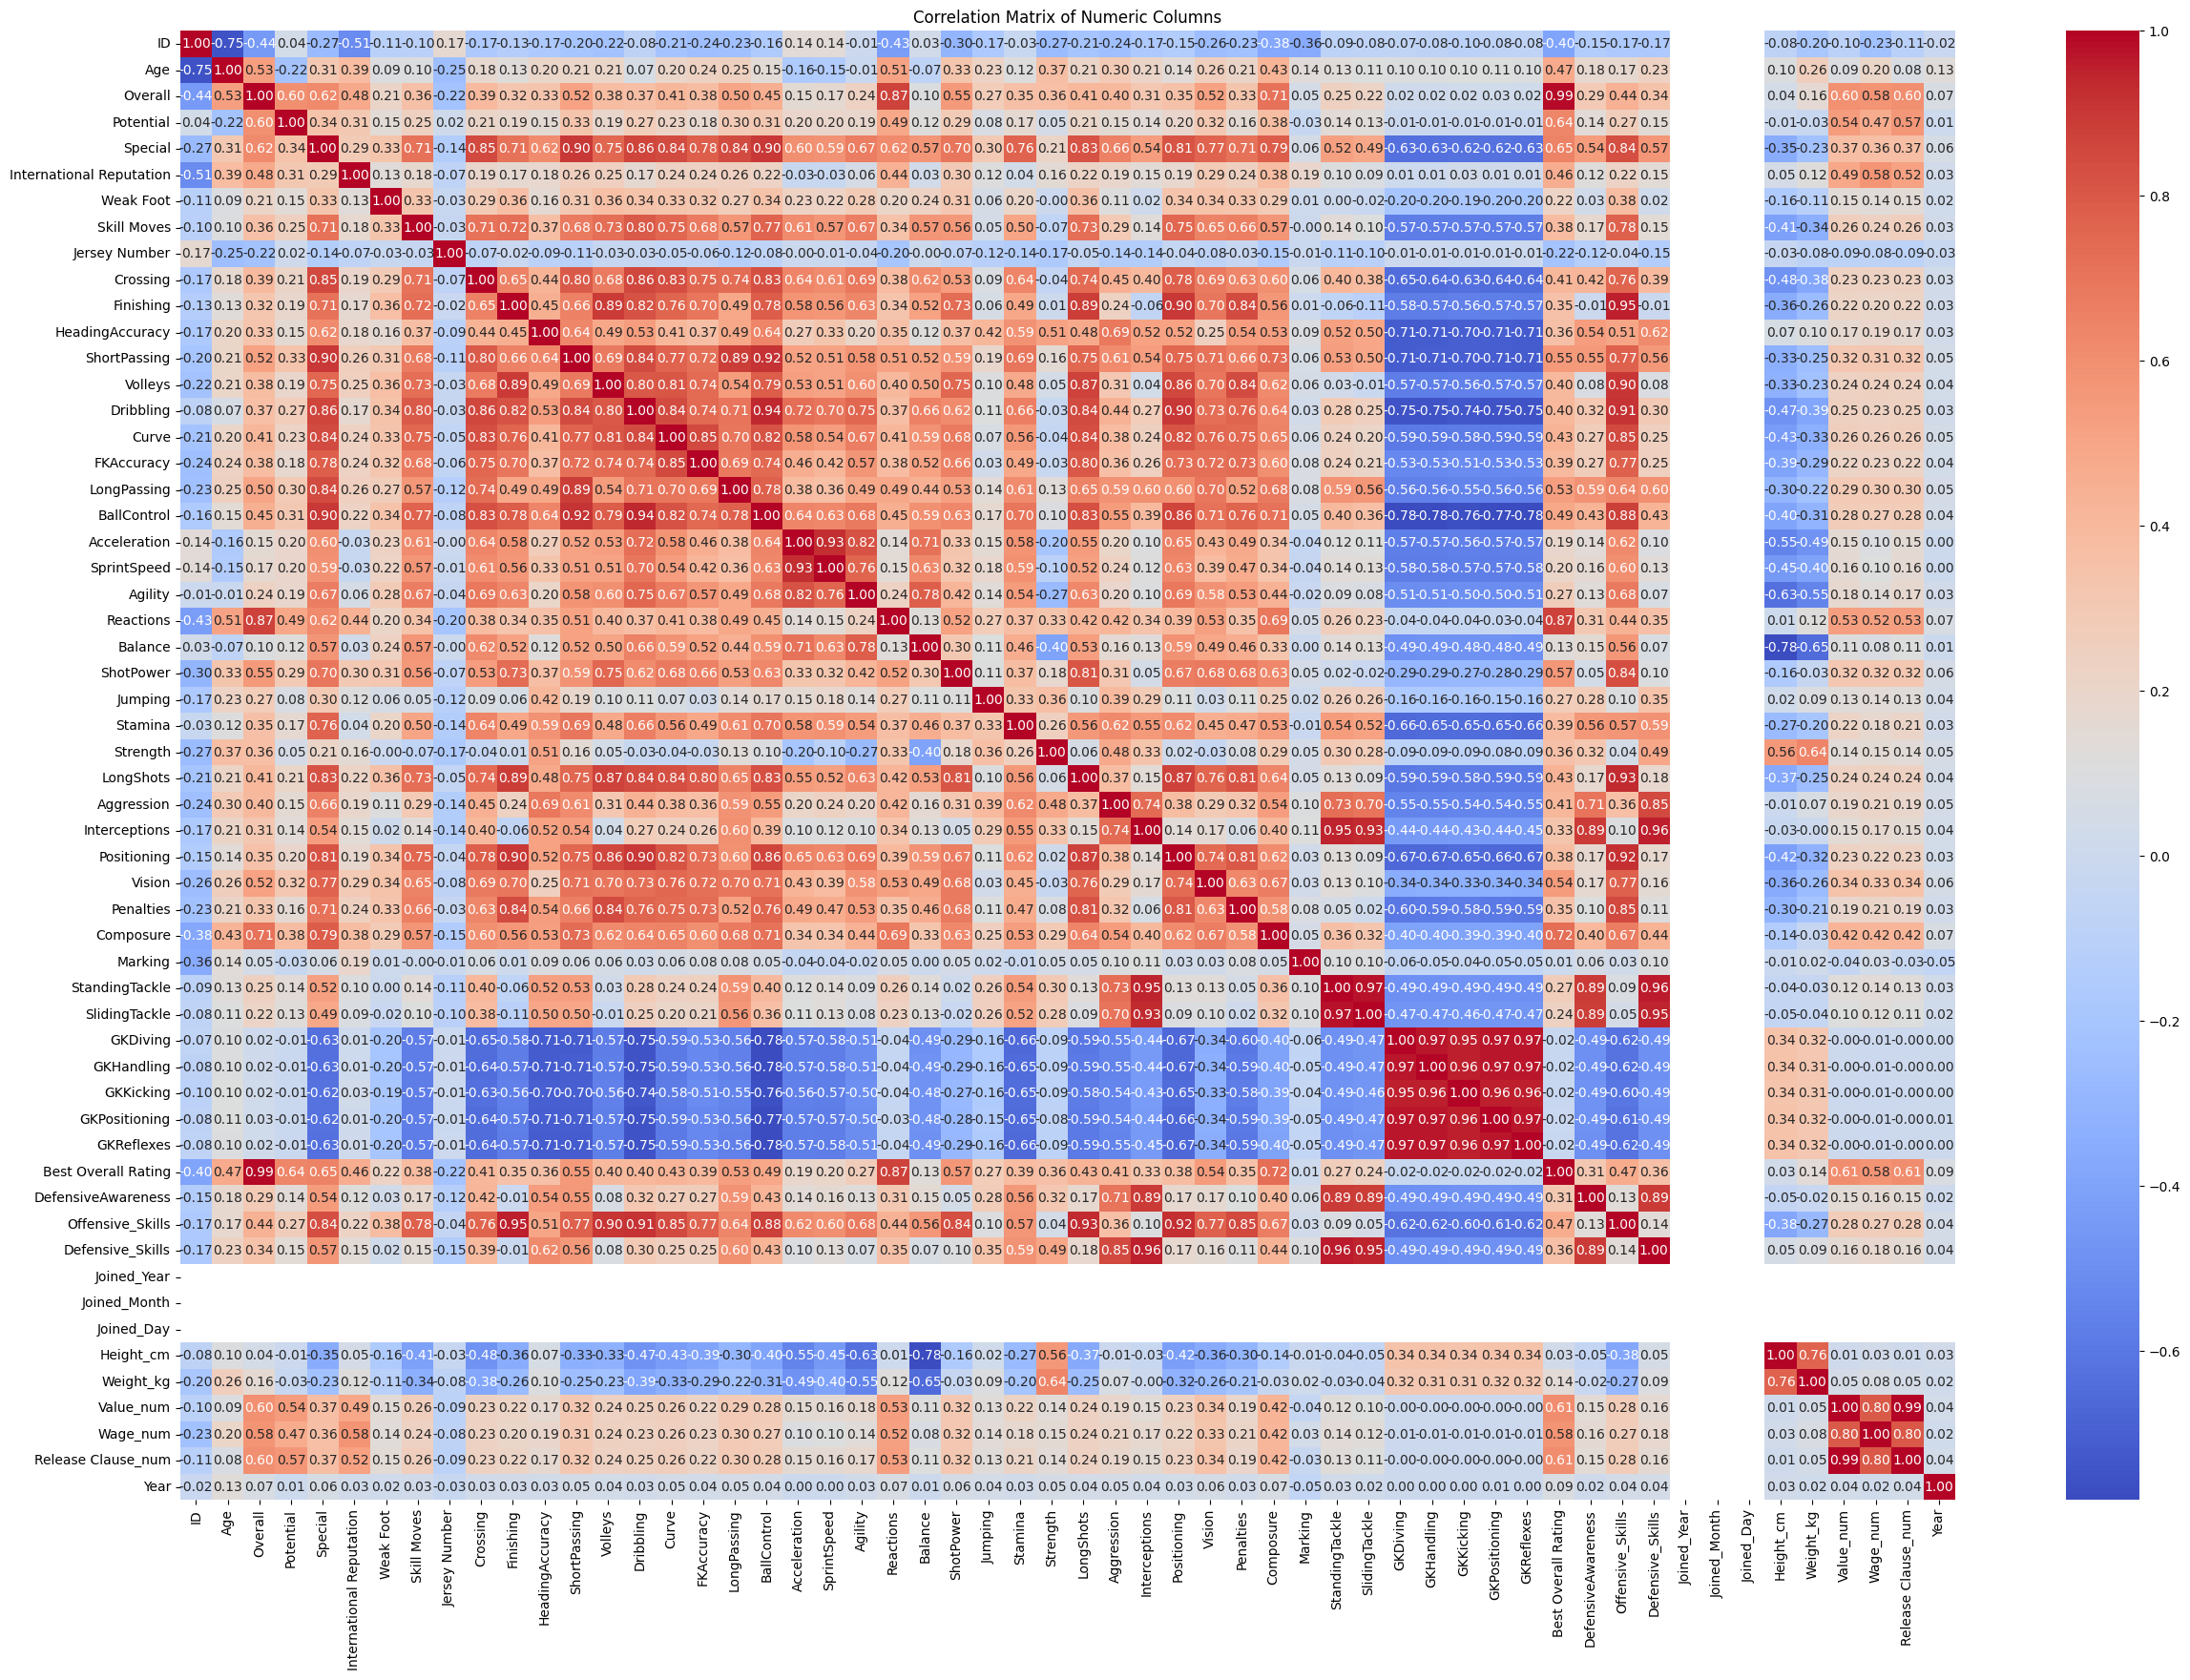

In [425]:
numeric_df = FIFA_DF.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [426]:
FIFA_ALL['Joined_Year'].head()


0    0
1    0
2    0
3    0
4    0
Name: Joined_Year, dtype: Int64